In [1]:
# phase 1 imports
import point
import region
import utils
# import functions_template as functions
import matplotlib
import matplotlib.pyplot as plt
listOfTrajectories = utils.importTrajectories("Trajectories")

In [2]:
def listTraj(listOfTrajectories):
    trajectories = []
    for traj in listOfTrajectories:
        trajectories += [[traj]]
    return trajectories

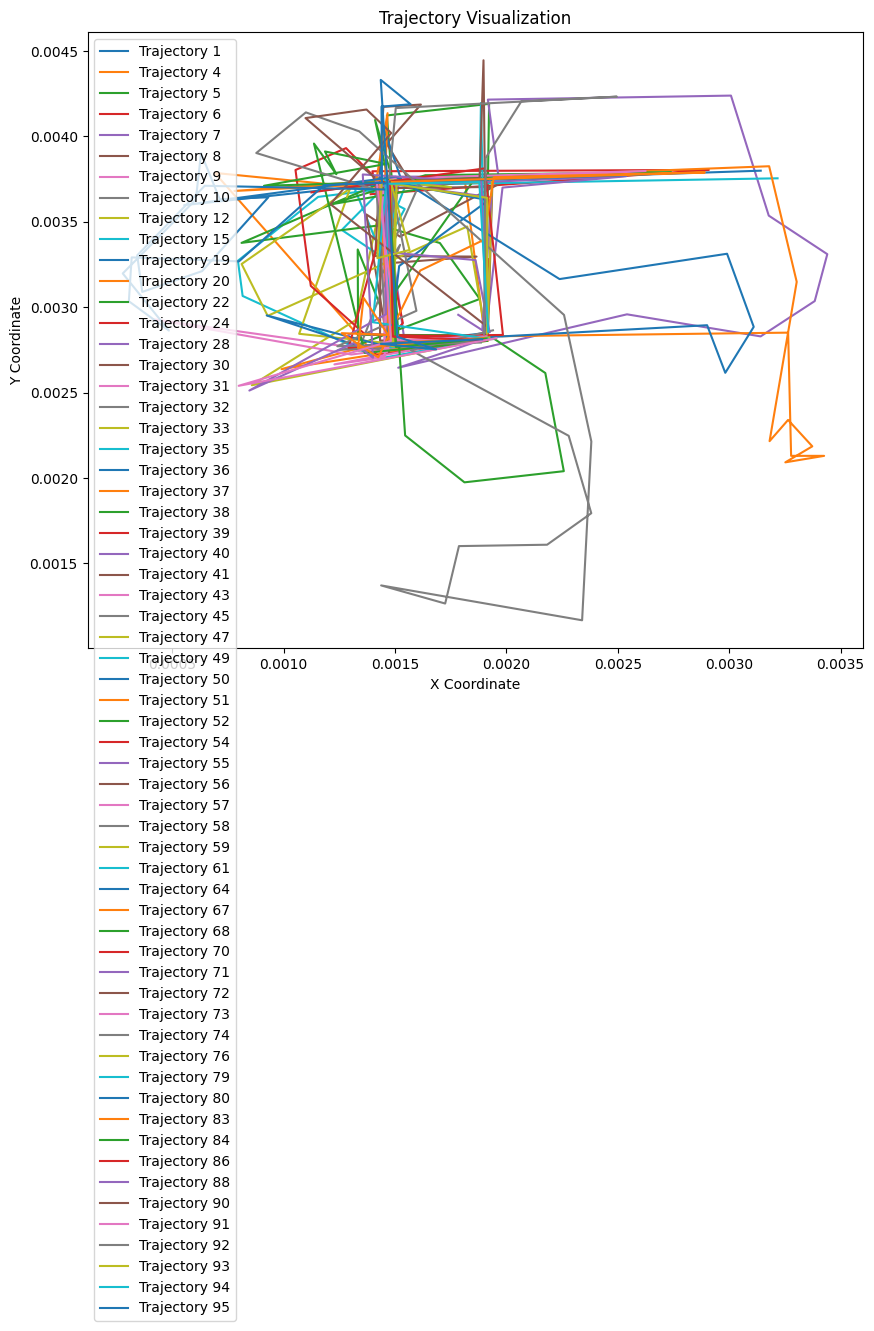

In [3]:
import math


class Point:
    def __init__(self, x, y):
        self.X = x
        self.Y = y

def calculateDistance(point: Point, p1: Point, p2: Point):
    m = (p2.Y - p1.Y) / (p2.X - p1.X) if (p2.X - p1.X) != 0 else math.inf
    a = m
    b = -1
    c = -(m * p1.X - p1.Y)
    d = abs((a * point.X + b * point.Y + c)) / (math.sqrt(a * a + b * b))
    return d

def douglas_peucker(points, epsilon):
    dmax = 0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = calculateDistance(points[i], points[0], points[end - 1])
        if d > dmax:
            index = i
            dmax = d

    if dmax > epsilon:
        rec_results1 = douglas_peucker(points[:index + 1], epsilon)
        rec_results2 = douglas_peucker(points[index:end], epsilon)

        return rec_results1[:-1] + rec_results2

    return [points[0], points[end - 1]]

def simplify_trajectories(trajectories, epsilon):
    simplified_trajectories = []
    for trajectory in trajectories:
        simplified_points = douglas_peucker(trajectory[0].points, epsilon)
        # print(trajectory[0].number, simplified_points)
        simplified_trajectories.append([simplified_points,trajectory[0].number])
    return simplified_trajectories

# Example usage:
# List of trajectories, each trajectory is represented as a list of Point objects
trajectories = listTraj(listOfTrajectories)

# Set the threshold epsilon value for simplification
epsilon = 0.0001

# Call the function to simplify all trajectories in the list
simplified_trajectories = simplify_trajectories(trajectories, epsilon)


# The 'simplified_trajectories' variable now contains the simplified version of all input trajectories.
def vis(trajectories):
    plt.figure(figsize=(10,8))
    for trajec in trajectories:
        x = []
        y = []
        for traj in trajec[0]:
            x.append(traj.X)
            y.append(traj.Y)
        plt.plot(x, y, label="Trajectory {}".format(str(trajec[1])))
     
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory Visualization')
    plt.legend()
    plt.show() 
vis(simplified_trajectories)


simple_trajectory = []
for straj in simplified_trajectories:
    for point in straj[0]:
        simple_trajectory.append(point)


In [4]:
import math

class Point:
    def __init__(self, x, y):
        self.X = x
        self.Y = y

def euclidean_distance(p1, p2):
    # Calculate the Euclidean distance between two points (p1 and p2)
    return math.sqrt((p2.X - p1.X)**2 + (p2.Y - p1.Y)**2)

def closest_pair_distance(trajectory):
    # Initialize the closest distance with a large value
    closest_distance = float('inf')

    # Iterate through all pairs of points in the trajectory
    for i in range(len(trajectory)):
        for j in range(i + 1, len(trajectory)):
            distance = euclidean_distance(trajectory[i], trajectory[j])
            # Update the closest distance if a shorter distance is found
            closest_distance = min(closest_distance, distance)

    return closest_distance

# Example usage:
# Assuming 'trajectory_points' is a list of Point objects representing a trajectory
trajectory_points = [Point(0, 0), Point(1, 1), Point(2, 3), Point(3, 4)]
closest_distance = closest_pair_distance(trajectory_points)
print("Closest Pair Distance:", closest_distance)


Closest Pair Distance: 1.4142135623730951


In [5]:
import math

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def calculate_distance(p1, p2):
    # Calculate the Euclidean distance between two points (p1 and p2)

    return math.sqrt((p2.X - p1.X)**2 + (p2.Y - p1.Y)**2)

def closest_pair_distance(T0, T1):
    min_distance = float('inf')
    closest_point_t0 = None
    closest_point_t1 = None

    # Loop through all points in trajectory T0
    for ai in T0:
        # Loop through all points in trajectory T1
        for bj in T1:
            # Calculate the distance between the current pair of points
            dist = calculate_distance(ai, bj)
            # Update the minimum distance if the current distance is smaller
            if dist < min_distance:
                min_distance = dist
                closest_point_t0 = ai
                closest_point_t1 = bj
    return min_distance, closest_point_t0, closest_point_t1


def plot_trajectories_with_line(T0, T1, closest_point_t0, closest_point_t1):
    x0 = []
    y0 = []   
    x1 = []
    y1 = []
   
    for traj in T0.points:
        x0.append(traj.X)
        y0.append(traj.Y)
        
    for traje in T1.points:
        x1.append(traje.X)
        y1.append(traje.Y)
        
    plt.figure(figsize=(10, 8))

    # Plot trajectory T0 in blue
    plt.plot(x0, y0, label='Trajectory T0', color='blue')

    # Plot trajectory T1 in red
    plt.plot(x1, y1, label='Trajectory T1', color='red')

    # Plot the closest points in the two trajectories as green points
    plt.scatter([closest_point_t0.X, closest_point_t1.X],
                [closest_point_t0.Y, closest_point_t1.Y], color='black')

    # Draw a dotted line between the closest points
    plt.plot([closest_point_t0.X, closest_point_t1.X],
             [closest_point_t0.Y, closest_point_t1.Y], color='green', linestyle='dotted')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Trajectory Visualization with Closest Pair Line')
    plt.legend()
    plt.show()





Enter the first trajectory number :  1
Enter the second trajectory number :  4


Closest-Pair Distance: 2.2745077681489984e-06
0 1


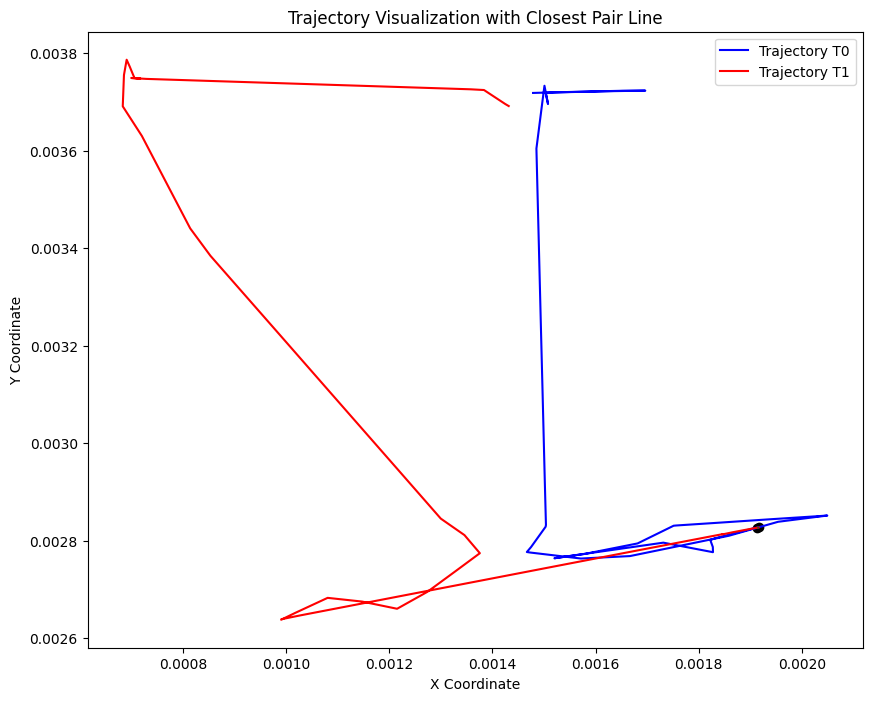

In [6]:
def number(user_1):
    l_index = -1
    for j, i in enumerate(listOfTrajectories):
        if user_1 == i.number:
            l_index = j
            break
    return l_index

user_1 = int(input(f"Enter the first trajectory number : "))
user_2 = int(input(f"Enter the second trajectory number : "))
listOfTrajectories = utils.importTrajectories("Trajectories")

num_1 = number(user_1)
num_2= number(user_2)


# Example usage:
# Create two sample trajectories (represented as lists of Point objects)
trajectory_0 = []
trajectory_1 = []



for i in listOfTrajectories[num_1].points:
    trajectory_0.append(i)
for j in listOfTrajectories[num_2].points:
    trajectory_1.append(j)
# Call the CPD function to calculate the closest-pair distance between the two trajectories
cpd, closest_point_t0, closest_point_t1 = closest_pair_distance(trajectory_0, trajectory_1)
print("Closest-Pair Distance:", cpd)

print(num_1,num_2)

# Call the function to display the plot
plot_trajectories_with_line(listOfTrajectories[num_1], listOfTrajectories[num_2], closest_point_t0, closest_point_t1)




# 